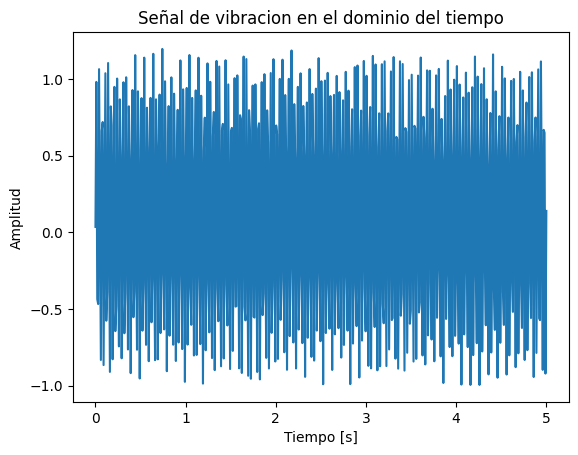

Evalor máximo de la señal fue: 1.1959470763759072
Evalor mínimo de la señal fue: -0.9951262609108599
Evalor promedio de la señal fue: 0.09759548889916439


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# tiempo (segundos)
t = np.linspace(0, 5, 500)

# Señal de vibración simulada
senal = np.sin(2 * np.pi * 30 * t) + 0.2 * np.random.rand(len(t))

# 30Hz ---> Rotacion aproximada
# randam.rand ---> ruido mecanico/entorno

# Grafico de señal
plt.figure()
plt.plot(t, senal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal de vibracion en el dominio del tiempo")
plt.show()

# promedio

np.mean(senal)
# máximo (max)

np.max(senal)  # el pico mas alto registrado

# minimo (min)
np.min(senal)  # el pico negativo mas extremo

print(f"Evalor máximo de la señal fue: {np.max(senal)}")
print(f"Evalor mínimo de la señal fue: {np.min(senal)}")
print(f"Evalor promedio de la señal fue: {np.mean(senal)}")

### ¿La señal oscila alrededor de cero ?

##### Si, la señal oscila alrededor de cero. Esto me lo pregunto para saber que

la medicion esta bien bien ya que asi valido que:
 - el sensor mide bien.
 - Que el montaje es corecto.
 - Que el dato es confiable.
 - Que puedo seguir analizando.

#### Respuesta profecional:
##### Se verificó que la señal de vibración oscile alrededor de cero para asegurar que no exista offset en la medición, garantizando la correcta adquicisión de los datos antes del analisis."

### ¿Es suave o tiene golpes?
#### Es suave(continua), No hay golpes aislados.

#### Qué se ve:
- Oscilación densa y continua.
- No hay picos "solitarios" que sobresalgan claramente.
- El ruido esta distribuido, no concentrado en inpactos.

### Conclusión tecnica
#### La vibración es continua, típica de:
- Rotación
- Ruido mecánico normal
- Funcionamiento estable

### ¿Hay ruido?

#### Si, hay ruido pero del tipo esperado.

Cómo lo sabemos:
- La señal no es una senoide perfecta
- Tiene "rugosidad"
- El espesor visual del trazo es grande

####📌En la vida real:

#### Una bomba real casi nunca tiene una señal limpia.

###¿El nivel general es estable?

### si.

- No se ve que la amplitud crezca con el tiempo.
- El alto de la señal se mantiene parecido entre 0 y 5s

####📌 Esto indica:

- No hay deterioro progresivo (al menos este tramo)
- No hay condición que empeore rápidamente.

#### Diagnostico honesto (como se haria en planta) "La señal de vibración en el dominio del tiempo se encuentra centrada en cero, con comportamiento continuo y sin presencia de immpacto. El nivel general es estable y no se observan eventos transitorios severos. La condición no muestra anomalias evidentes en el dominio temporal, por lo que se justifica continuar con el analisis en el dominio de la frecuencia."



## Estadísticos básicos de la señal

En esta sección se calculan estadísticos básicos utilizados en mantenimiento predictivo para resumir el comportamiento de la señal y facilitar la comparación entre diferentes estados del equipo.


### Cálculo de estadísticas básicas de la señal original

In [2]:
rms = np.sqrt(np.mean(senal**2))
max_val = np.max(senal)
min_val = np.min(senal)
ptp = max_val - min_val
std = np.std(senal)

print("RMS:", rms)
print("Máximo:", max_val)
print("Mínimo:", min_val)
print("Peak-to-Peak:", ptp)
print("Desviación estándar:", std)

RMS: 0.7167728206903586
Máximo: 1.1959470763759072
Mínimo: -0.9951262609108599
Peak-to-Peak: 2.1910733372867672
Desviación estándar: 0.7100974560065303


## Creación de una nueva señal, pero alterada.

Esto simula:

- más energía

- más ruido

- condición degradada

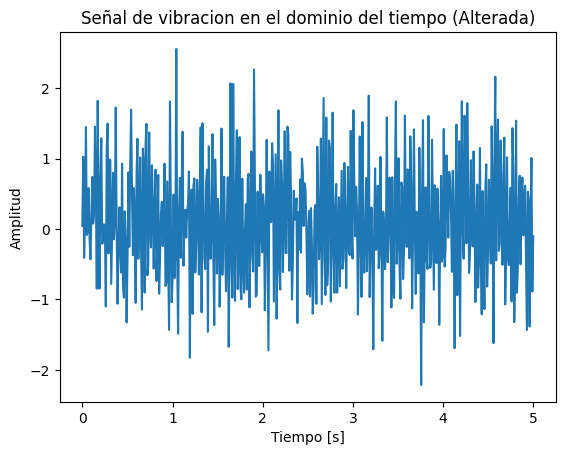

Evalor máximo de la señal fue: 2.557161796600615
Evalor mínimo de la señal fue: -2.2144556518544434
Evalor promedio de la señal fue: 0.10584633497387841


In [3]:
senal_alterada = senal + 0.5 * np.random.randn(len(senal))

# Grafico de señal
plt.figure()
plt.plot(t, senal_alterada)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal de vibracion en el dominio del tiempo (Alterada)")
plt.show()

# promedio

np.mean(senal_alterada)
# máximo (max)

np.max(senal_alterada)  # el pico mas alto registrado

# minimo (min)
np.min(senal_alterada)  # el pico negativo mas extremo

print(f"Evalor máximo de la señal fue: {np.max(senal_alterada)}")
print(f"Evalor mínimo de la señal fue: {np.min(senal_alterada)}")
print(f"Evalor promedio de la señal fue: {np.mean(senal_alterada)}")

## Calculos estadísticos de la señal alterada

In [4]:
rms_alt = np.sqrt(np.mean(senal_alterada**2))
max_alt = np.max(senal_alterada)
min_alt = np.min(senal_alterada)
ptp_alt = max_alt - min_alt
std_alt = np.std(senal_alterada)

print("RMS alterada:", rms_alt)
print("Máximo alterada:", max_alt)
print("Mínimo alterada:", min_alt)
print("Peak-to-Peak alterada:", ptp_alt)
print("Desviación estándar alterada:", std_alt)

RMS alterada: 0.8521102971731781
Máximo alterada: 2.557161796600615
Mínimo alterada: -2.2144556518544434
Peak-to-Peak alterada: 4.771617448455059
Desviación estándar alterada: 0.8455107994113141


### Comparación entre ambas señales

In [5]:
import pandas as pd

df_stats = pd.DataFrame({
    "Métrica": ["RMS", "Máx", "Mín", "Peak-to-Peak", "Std"],
    "Señal normal": [rms, max_val, min_val, ptp, std],
    "Señal alterada": [rms_alt, max_alt, min_alt, ptp_alt, std_alt]
})

df_stats


,Métrica,Señal normal,Señal alterada
0,RMS,0.716773,0.852110
1,Máx,1.195947,2.557162
2,Mín,-0.995126,-2.214456
3,Peak-to-Peak,2.191073,4.771617
4,Std,0.710097,0.845511


### Interpretación de los estadísticos

Al comparar ambas señales, se observa que la señal alterada presenta un aumento del valor RMS, mayor peak-to-peak y una desviación estándar más elevada.
Esto indica un incremento en la energía y variabilidad de la vibración, compatible con una condición anómala respecto al estado normal del equipo.
Los estadísticos permiten detectar cambios de condición sin necesidad de analizar la señal completa.
